In [1]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

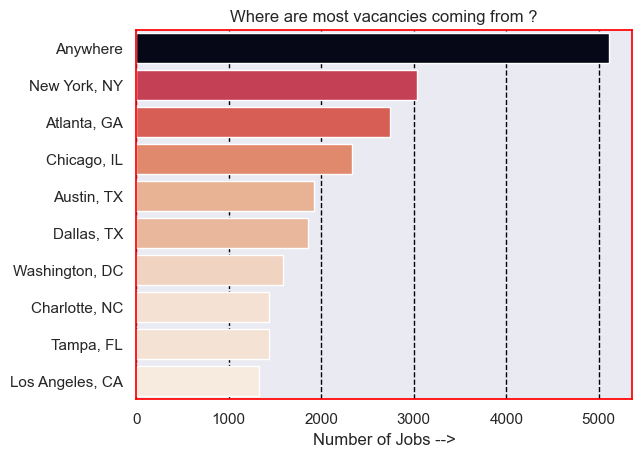

In [14]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

custom = {"axes.edgecolor": "red", "grid.linestyle": "dashed", "grid.color": "black"}
sns.set_style("darkgrid", rc = custom)
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='rocket_r')
plt.title('Where are most vacancies coming from ?')
plt.xlabel('Number of Jobs -->')
plt.ylabel('')
plt.legend().remove()
plt.show()

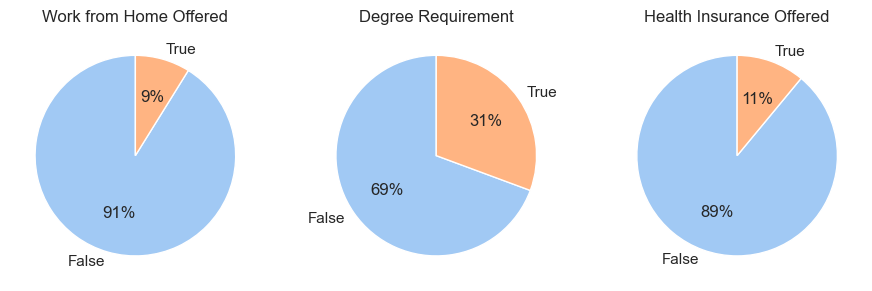

In [16]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

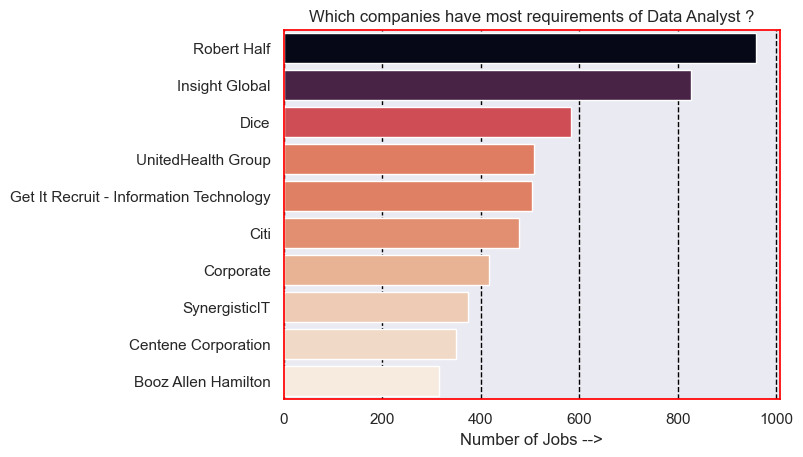

In [18]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

custom = {"axes.edgecolor": "red", "grid.linestyle": "dashed", "grid.color": "black"}
sns.set_style("darkgrid", rc = custom)
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='rocket_r')
plt.title('Which companies have most requirements of Data Analyst ?')
plt.xlabel('Number of Jobs -->')
plt.ylabel('')
plt.legend().remove()
plt.show()

# What are the most demanded skills for top 3 most popular data roles ?

Cheat Sheet: (Will look at it later once we have achieved above ! ) Awesome ali, you're up for a challenge aren't you?

In [2]:
dfp = df[['job_title_short', 'job_skills']].copy()

In [3]:
dfp = dfp[df['job_country'] == 'United States'].copy()

In [4]:
dfp = dfp.dropna()
dfp.head(5)

,job_title_short,job_skills
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
5,Data Engineer,"[python, sql, gcp]"
6,Senior Data Engineer,"[sql, python, java, sql server, gcp, bigquery,..."
9,Data Scientist,"[sql, python, r, mongodb, mongodb, sql server,..."
11,Data Engineer,"[python, qlik]"


In [5]:
top_jobs = dfp['job_title_short'].value_counts().head(3)
top_jobs

job_title_short
Data Analyst      57391
Data Scientist    51621
Data Engineer     33306
Name: count, dtype: int64

In [39]:
top_jobs_counting = top_jobs

In [7]:
top_job_list = list(top_jobs.index)
top_job_list

['Data Analyst', 'Data Scientist', 'Data Engineer']

In [8]:
top_jobs = dfp[dfp['job_title_short'].isin(top_job_list)]


In [9]:
top_jobs.head(5)

,job_title_short,job_skills
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
5,Data Engineer,"[python, sql, gcp]"
9,Data Scientist,"[sql, python, r, mongodb, mongodb, sql server,..."
11,Data Engineer,"[python, qlik]"
17,Data Scientist,"[go, apl, excel]"


In [10]:
top_skills = top_jobs.explode('job_skills')
top_skills.head(5)

,job_title_short,job_skills
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab
3,Data Engineer,aws


In [11]:
top = top_skills.groupby(['job_title_short','job_skills']).agg(
    skill_count = ('job_skills', 'count')
)
top.sort_values(['job_title_short', 'skill_count'], ascending=False, inplace=True)


In [12]:
top

skill_count
job_title_short job_skills             
Data Scientist  python            42379
                sql               30034
                r                 26022
                sas               14340
                tableau           13859
...                                 ...
Data Analyst    msaccess              1
                openstack             1
                qt                    1
                theano                1
                xamarin               1

[667 rows x 1 columns]

In [13]:
final = top.groupby('job_title_short').head(5)

In [14]:
final

skill_count
job_title_short job_skills             
Data Scientist  python            42379
                sql               30034
                r                 26022
                sas               14340
                tableau           13859
Data Engineer   sql               23958
                python            22762
                aws               15018
                azure             11321
                spark             11242
Data Analyst    sql               34452
                excel             27519
                tableau           19311
                python            18382
                sas               13200

In [15]:
final = final.reset_index()

In [16]:
unique_job = final['job_title_short'].unique()


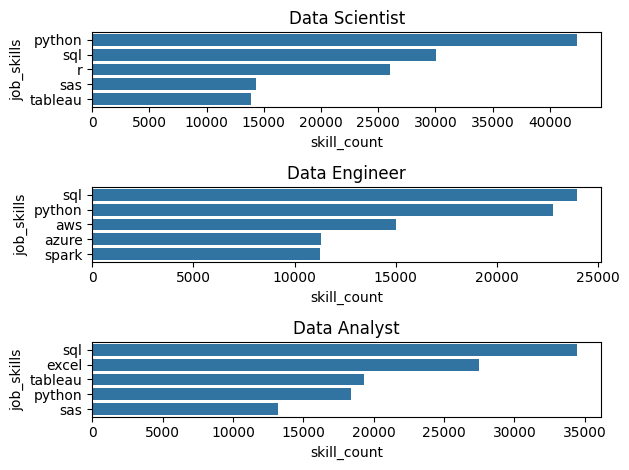

In [24]:
fig, ax = plt.subplots(len(unique_job), 1)
for i, job_title in enumerate(unique_job):
    df_plot = final[final['job_title_short'] == job_title]
    # df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax = ax[i], title=job_title)
    sns.barplot(data=df_plot, y='job_skills', x='skill_count', ax=ax[i])
    ax[i].set_title(job_title)

plt.tight_layout()

In [40]:
temp = top_jobs_counting.groupby('job_title_short').size()
temp

job_title_short
Data Analyst      57391
Data Engineer     33306
Data Scientist    51621
dtype: int64

In [41]:
temp = temp.reset_index(name='job_total_count')
temp

,job_title_short,job_total_count
0,Data Analyst,57391
1,Data Engineer,33306
2,Data Scientist,51621


In [42]:
skill_importance = pd.merge(final, temp, how='left', on='job_title_short')
skill_importance

,job_title_short,job_skills,skill_count,job_total_count
0,Data Scientist,python,42379,51621
1,Data Scientist,sql,30034,51621
2,Data Scientist,r,26022,51621
3,Data Scientist,sas,14340,51621
4,Data Scientist,tableau,13859,51621
5,Data Engineer,sql,23958,33306
6,Data Engineer,python,22762,33306
7,Data Engineer,aws,15018,33306
8,Data Engineer,azure,11321,33306
9,Data Engineer,spark,11242,33306


In [46]:
skill_importance['percentage'] = (skill_importance['skill_count']/skill_importance['job_total_count'])*100

In [47]:
skill_importance

,job_title_short,job_skills,skill_count,job_total_count,percentage
0,Data Scientist,python,42379,51621,82.096434
1,Data Scientist,sql,30034,51621,58.181748
2,Data Scientist,r,26022,51621,50.409717
3,Data Scientist,sas,14340,51621,27.779392
4,Data Scientist,tableau,13859,51621,26.847601
5,Data Engineer,sql,23958,33306,71.932985
6,Data Engineer,python,22762,33306,68.342040
7,Data Engineer,aws,15018,33306,45.090975
8,Data Engineer,azure,11321,33306,33.990873
9,Data Engineer,spark,11242,33306,33.753678


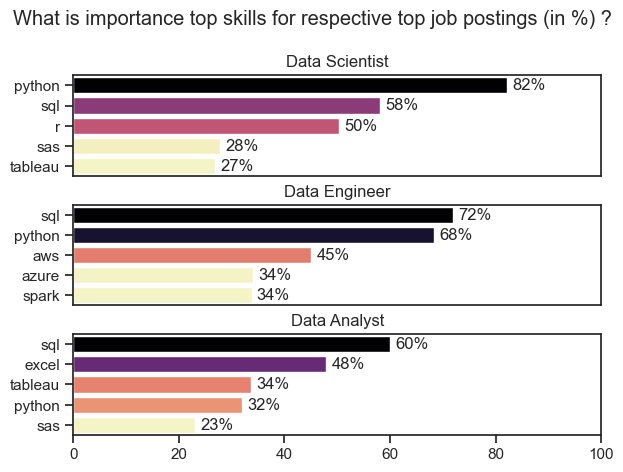

In [71]:
fig, ax = plt.subplots(len(unique_job), 1)
sns.set_theme(style='ticks')
for i, job_title in enumerate(unique_job):
    df_plot = skill_importance[skill_importance['job_title_short'] == job_title]
    sns.barplot(data=df_plot, y='job_skills', x='percentage', ax=ax[i], hue='skill_count', palette='magma_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,100)

    for n, v in enumerate(df_plot['percentage']):
        ax[i].text(v+1,n,f'{v:.0f}%', va='center')
    if i != len(unique_job) - 1:
        ax[i].set_xticks([])

fig.suptitle("What is importance top skills for respective top job postings (in %) ?")
plt.tight_layout(h_pad=.5)